In [1]:
# -----------------------------------------------------------------------
# author: Huang Jintao
# date: 2020-5-10
#
# 该文件功能:
# 1. 绘制一周中每天每时刻的单车使用量图——折线图(-out)

# 2. 绘制一周中每天每时刻的剩余单车的增减量——折线图(in-out)

# 3. 绘制一周中每天每时刻的剩余单车的剩余量累积值——折线图(实际意义: 其倒数为当前时刻骑行在外的单车数)

# 4. 绘制一周中每天总单车使用量——条形图(-out)
# -----------------------------------------------------------------------


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

# 中文字体环境设置
plt.rcParams['font.sans-serif'].insert(0, 'SimSun')
plt.rcParams['axes.unicode_minus'] = False

start_out, end_in = pd.read_pickle("start_out.pkl"), pd.read_pickle("end_in.pkl")

0 15784


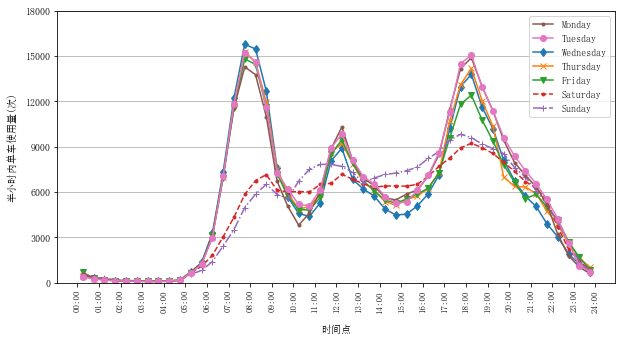

In [3]:

# 1. 绘制一周中每天每时刻的单车使用量图——折线图(-out)
z = np.sum(-start_out, axis=(0, 1))
print(z.min(), z.max())  # 0 15784
# 1.1 设置axes
plt.figure(figsize=(10, 5))
ticks = []  # 时间点
labels = []  #
for i in range(49):
    if i % 2 == 0:
        ticks.append(i)
        labels.append("%02d:00" % (i // 2))

plt.ylabel("半小时内单车使用量(次)", labelpad=8.)
plt.xlabel("时间点", labelpad=12.)
plt.xticks(ticks, labels, fontsize=9, rotation=90)
plt.yticks(np.arange(0, 18001, 3000))
# plt.xlim(-1, 49)
plt.ylim(0, 18000)
plt.grid(axis='y')
# 1.2 画图
labels = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
handles = []
fmts = ["d-", "x-", "v-", ".--", "+-.", ".-", "o-"]

for i in range(7):
    x = z[i * 48:(i + 1) * 48]
    handles += plt.plot(np.arange(len(x)) + 0.5, x, fmts[i])
for i in range(2):  # 原数据是"Wednesday"开始的，此处进行调整顺序(为legend服务)
    handles.insert(0, handles.pop(-1))

plt.legend(handles, labels)
plt.savefig("-out.png", dpi=200, bbox_inches='tight')
plt.show()
plt.close()


-1248 1246


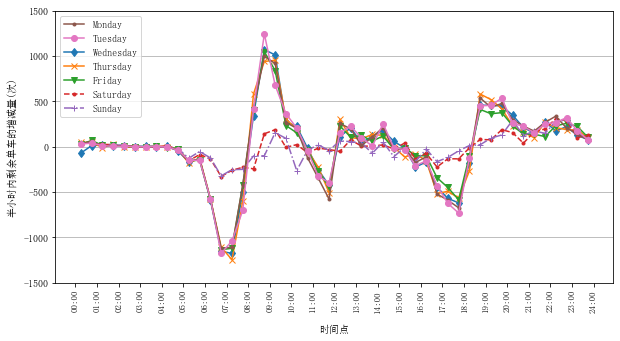

In [4]:

# 2. 绘制一周中每天每时刻的剩余单车的增减量——折线图(in-out)
z = np.sum(start_out + end_in, axis=(0, 1))
print(z.min(), z.max())  # -1248 1246

# 2.1 设置axes
plt.figure(figsize=(10, 5))
ticks = []  # 时间点
labels = []  #
for i in range(49):
    if i % 2 == 0:
        ticks.append(i)
        labels.append("%02d:00" % (i // 2))

plt.ylabel("半小时内剩余单车的增减量(次)", labelpad=6.)
plt.xlabel("时间点", labelpad=12.)
plt.xticks(ticks, labels, fontsize=9, rotation=90)
plt.yticks(np.arange(-1500, 1501, 500))
# plt.xlim(-1, 49)
plt.ylim(-1500, 1500)
plt.grid(axis='y')
# 2.2 画图
labels = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
handles = []
fmts = ["d-", "x-", "v-", ".--", "+-.", ".-", "o-"]

for i in range(7):
    x = z[i * 48:(i + 1) * 48]
    handles += plt.plot(np.arange(len(x)) + 0.5, x, fmts[i])
for i in range(2):  # 原数据是"Wednesday"开始的，此处进行调整顺序(为legend服务)
    handles.insert(0, handles.pop(-1))

plt.legend(handles, labels)
plt.savefig("in+out.png", dpi=200, bbox_inches='tight')
plt.show()
plt.close()



-3888 -1


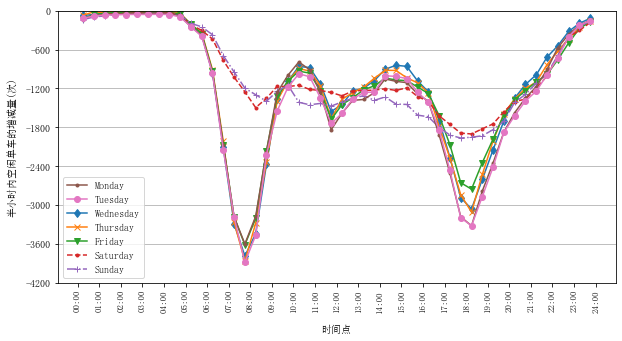

In [5]:

# 3. 绘制一周中每天每时刻的剩余单车的剩余量累积值——折线图(实际意义: 其倒数为当前时刻骑行在外的单车数)
# 3.1 计算累积量
temp = np.sum(start_out + end_in, axis=(0, 1))  # shape(336,)
z = np.zeros_like(temp)
z[0] = temp[0]
for i in range(1, z.shape[0]):
    z[i] = z[i - 1] + temp[i]
del temp  # 释放资源
print(z.min(), z.max())  # -3888 -1
# 3.2 可视化

# 3.2.1 设置axes
plt.figure(figsize=(10, 5))
ticks = []  # 时间点
labels = []  #
for i in range(49):
    if i % 2 == 0:
        ticks.append(i)
        labels.append("%02d:00" % (i // 2))

plt.ylabel("半小时内空闲单车的增减量(次)", labelpad=8.)
plt.xlabel("时间点", labelpad=12.)
plt.xticks(ticks, labels, fontsize=9, rotation=90)
plt.yticks(np.arange(-4200, 1, 600))
# plt.xlim(-1, 49)
plt.ylim(-4200, 0)
plt.grid(axis='y')

# 3.2.2 画图
labels = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
handles = []
fmts = ["d-", "x-", "v-", ".--", "+-.", ".-", "o-"]

for i in range(7):
    x = z[i * 48:(i + 1) * 48]
    handles += plt.plot(np.arange(len(x)) + 0.5, x, fmts[i])
for i in range(2):  # 原数据是"Wednesday"开始的，此处进行调整顺序(为legend服务)
    handles.insert(0, handles.pop(-1))

plt.legend(handles, labels)
plt.savefig("in+out累积值.png", dpi=200, bbox_inches='tight')
plt.show()
plt.close()

223110 286458


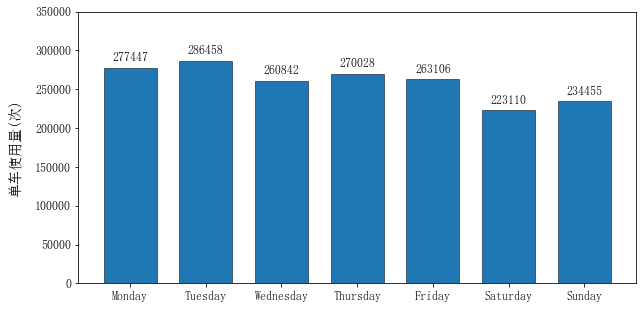

In [6]:
# 4. 绘制一周中每天总单车使用量——条形图(-out)
temp = np.sum(-start_out, axis=(0, 1))
z = np.zeros((7,), dtype=np.int32)
for i in range(z.shape[0]):
    z[i] = np.sum(temp[48 * i: 48 * (i + 1)])
del temp  # 释放资源
print(z.min(), z.max())  # 223110 286458
z = np.concatenate([z[-2:], z[:-2]])  # 原数据是"Wednesday"开始的. 调整数据顺序
# 4.1 设置axes
plt.figure(figsize=(10, 5))
ticks = [0, 1, 2, 3, 4, 5, 6]
labels = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

plt.ylabel("单车使用量(次)", labelpad=14., fontsize=14)

plt.xticks(ticks, labels, fontsize=12)
plt.yticks(np.arange(0, 350001, 50000), fontsize=12)
plt.ylim(0, 350000)

# 4.2 画图
x = np.arange(0, 7)
plt.bar(x, z, width=0.7, edgecolor="k", linewidth=0.5)
for i, j in zip(x, z):  # 加上 上头的 数字
    plt.text(i, j + 6000, j, ha="center", va="bottom", fontsize=12)
plt.savefig("周图-out.png", dpi=200, bbox_inches='tight')
plt.show()
plt.close()
